# k-means algorithm

Comparison of sklean k-means to hand coded implementation. k-means clustering is one of the oldest clustering techniques. However it is still actively used and research, partially because it is simple and scales well to large data sets. A few recent works include:

* (2007) [kmeans++: The Advantage of Careful Seeding](https://dl.acm.org/citation.cfm?id=1283494) (this is used in scikit learn for initializing clusters)
* (2012) [NIPS Small Variance Asymptotics: k-means and mixture models](http://papers.nips.cc/paper/4853-small-variance-asymptotics-for-exponential-family-dirichlet-process-mixture-models)
* (2018) [Clustering with Measurement Error](http://www3.stat.sinica.edu.tw/ss_newpaper/SS-2017-0093_na.pdf) 

In [65]:
import numpy as np
from sklearn import datasets

In [66]:
iris = datasets.load_iris()
X = iris.data

In [67]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
X.shape

(150, 4)

In [69]:
K = 3
p = X.shape[1]
n = X.shape[0]

In [70]:
## initialize parameters
mu = np.zeros(K*p).reshape((K,p))
C = np.random.randint(low=0,high=K,size=n)

In [72]:
## run algorithm
N = 1000 ## number of iterations
for jj in np.arange(N):
    ## update cluster centers
    for k in np.arange(K):
        mu[k,:] = np.mean(X[C==k,:],axis=0)
    ## update cluster memberships
    for ii in np.arange(n):
        C[ii] = np.argmin(np.sum(np.power(mu - X[ii,:],2),axis=1))
        
## NOTE: should functionalize code i.e.
## def kmeans(X,K,init):
##       where X is data matrix, K=number of clusters, init are initial cluster centers

## Plot Results

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

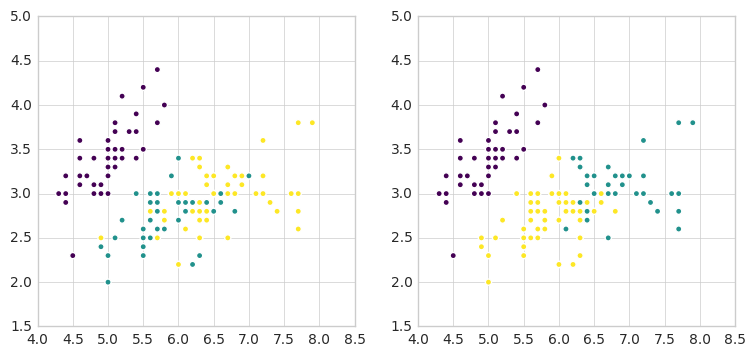

In [113]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (9, 4)
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=iris.target, cmap='viridis',edgecolor='white');
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=C,cmap='viridis',edgecolor='white');

Note: Group labels are arbitrary.

## k-means built into scikit

In [110]:
from sklearn.cluster import KMeans

In [111]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

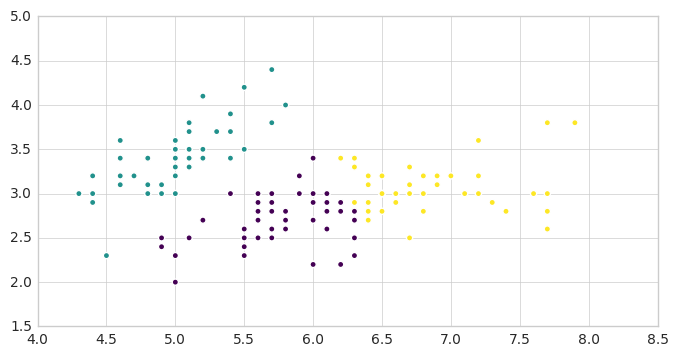

In [112]:
plt.scatter(X[:,0],X[:,1],c=kmeans.predict(X),cmap='viridis',edgecolor='white');

In [15]:
import numpy as np
a = np.arange(4).reshape(2,2)

In [17]:
a

array([[0, 1],
       [2, 3]])

In [18]:
b = np.arange(6).reshape(2,3) + 10

In [19]:
b

array([[10, 11, 12],
       [13, 14, 15]])

In [20]:
b[:,0]

array([10, 13])

In [21]:
a - b[:,0]

array([[-10, -12],
       [ -8, -10]])